<a href="https://colab.research.google.com/github/Midhunmadhav333/Loan-prediction-based-on-customer-behaviour/blob/main/Loan_prediction_based_on_customer_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan prediction based on customer behaviour**

Submitted by **Midhun Madhav C P**

**PROBLEM STATEMENT**

The increasing complexity of financial markets and the growing need for responsible lending practices necessitate the development of robust risk evaluation models. This project aims to create an accurate predictive model that assesses the risk associated with lending to potential borrowers. By leveraging historical borrower data, the model will provide insights into the likelihood of default, enabling lenders to make informed decisions that balance financial risk and customer service. The primary goal is to enhance the efficiency of the lending process, minimize defaults, and foster sustainable lending practices.

**OBJECTIVE**

The main objective of this project is to develop a reliable and accurate model that can evaluate the risk associated with lending money to potential borrowers. By analyzing various customer-related factors and their historical behavior, we aim to predict whether a loan applicant is likely to default or repay the loan on time.

**LOADING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stat
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report, roc_curve, auc,precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, RocCurveDisplay
from scipy.stats import skew
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pickle
import os
from sklearn.model_selection import RandomizedSearchCV
import time
import pickle

**LOADING DATASET**

In [ ]:
df=pd.read_csv(r'/content/Loan_prediction_based_on_customer_behaviour.csv')

**UNDERSTANDING THE DATA**

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


**DATA DESCRIPTION**

This classic dataset contains full details about almost 252000 customers.It's a great dataset for learning to work with data analysis and visualization.

**DATASET**: https://drive.google.com/file/d/1RHSzUw9_aVwlejd-sQsqSmaZK8cRzetR/view?usp=drive_link

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
df.shape

(252000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.500000,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


**Data cleaning**

City and State columns have some special characters and numbers. so we need to clean it

In [ ]:
def unclean_names(df, col):

    # Return a list of unique names in the specified column that end with ']'

    return [name for name in df[col].unique() if isinstance(name, str) and name.endswith(']')]

# Use the function to find unclean names in the 'CITY' column

unclean_city_names = unclean_names(df, 'CITY')
unclean_city_names

['Tiruchirappalli[10]',
 'Kota[6]',
 'Hajipur[31]',
 'Erode[17]',
 'Anantapuram[24]',
 'Aurangabad[39]',
 'Purnia[26]',
 'Eluru[25]',
 'Siwan[32]',
 'Motihari[34]',
 'Warangal[11][12]',
 'Jehanabad[38]',
 'Kishanganj[35]',
 'Tirupati[21][22]',
 'Kurnool[18]',
 'Kadapa[23]',
 'Jammu[16]',
 'Rajahmundry[19][20]',
 'Saharsa[29]',
 'Jamalpur[36]',
 'Dehri[30]',
 'Nellore[14][15]',
 'Visakhapatnam[4]',
 'Buxar[37]',
 'Ramagundam[27]',
 'Sasaram[30]',
 'Guntur[13]',
 'Chittoor[28]',
 'Bettiah[33]',
 'Mysore[7][8][9]']

In [ ]:
unclean_city_names = unclean_names(df, 'STATE')
unclean_city_names

['Uttar_Pradesh[5]']

**Remove specific characters from the name**

There are some specific characters in state and city columns

Update the value in the DataFrame

Assuming 'STATE' and 'CITY' are columns in your DataFrame

In [ ]:
def clean_df(df, col, unclean_list):
    for index, name in enumerate(df[col]):
        if name in unclean_list:
            if name.endswith(']'):


                cleaned_name = name.strip('[]0123456789')

                # Update the value in the DataFrame

                df.loc[index, col] = cleaned_name



clean_df(df, 'STATE', unclean_city_names)
clean_df(df, 'CITY', unclean_city_names)

In [ ]:
df['CITY']

,CITY
0,Rewa
1,Parbhani
2,Alappuzha
3,Bhubaneswar
4,Tiruchirappalli[10]
...,...
251995,Kolkata
251996,Rewa
251997,Kalyan-Dombivli
251998,Pondicherry


In [ ]:
df['STATE']

,STATE
0,Madhya_Pradesh
1,Maharashtra
2,Kerala
3,Odisha
4,Tamil_Nadu
...,...
251995,West_Bengal
251996,Madhya_Pradesh
251997,Maharashtra
251998,Puducherry


**Checking null values**

In [ ]:
df.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


**Assuming there are not any null values**

**Finding Duplicate values**

In [ ]:
df.duplicated().sum()

0


# **DATA PREPROCESSING**

**Dicteting outliers**

detecting outliers is crucial to improve the quality and reliability of your analysis and modeling outcomes.

Here Creating boxplots for numerical_features

<Axes: ylabel='Income'>

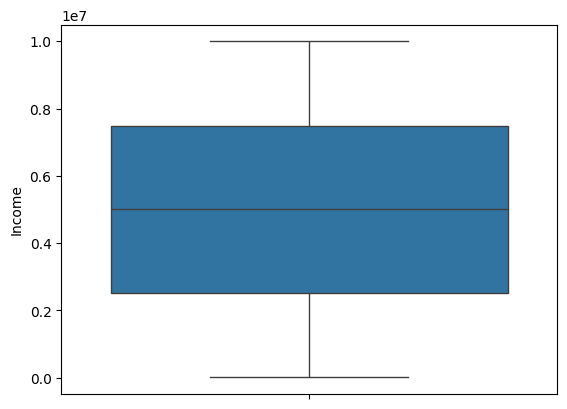

In [ ]:
sns.boxplot(df['Income'])

<Axes: ylabel='CURRENT_JOB_YRS'>

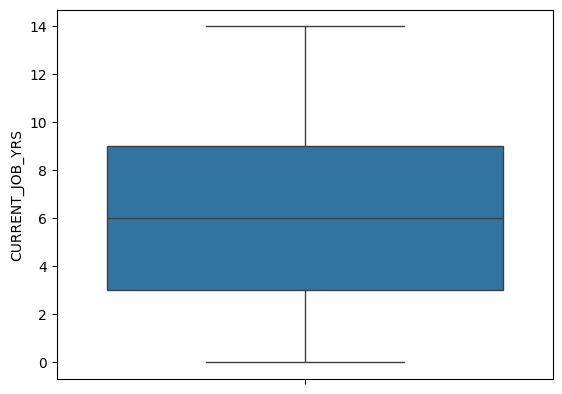

In [ ]:
sns.boxplot(df['CURRENT_JOB_YRS'])

<Axes: ylabel='CURRENT_HOUSE_YRS'>

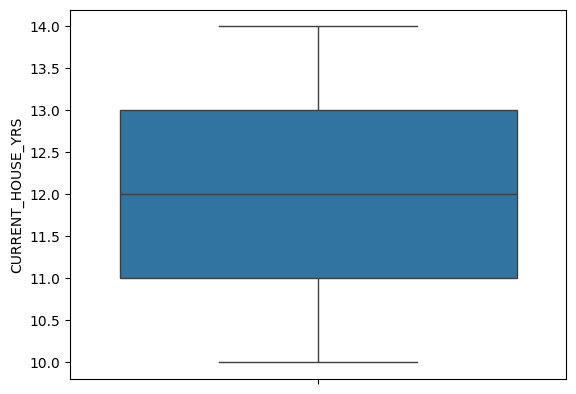

In [ ]:
sns.boxplot(df['CURRENT_HOUSE_YRS'])

<Axes: ylabel='Experience'>

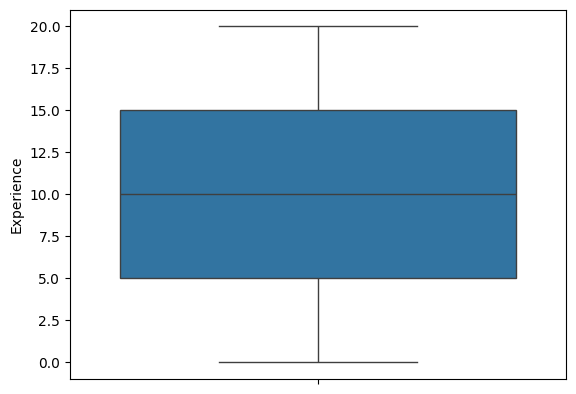

In [ ]:
sns.boxplot(df['Experience'])

**Outlier Detection based on IQR**

In [ ]:
def detect_outlier_iqr(df, target_column='Risk_Flag'):
    outlier_count = {}
    for column in df.select_dtypes(include='number').columns:
        if column == target_column:
            continue
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = outliers.shape[0]
    return outlier_count

outliers_iqr = detect_outlier_iqr(df)

outliers_df = pd.DataFrame(list(outliers_iqr.items()), columns=['Column', 'Number of Outliers'])
outliers_df


,Column,Number of Outliers
0,Id,0
1,Income,0
2,Age,0
3,Experience,0
4,CURRENT_JOB_YRS,0
5,CURRENT_HOUSE_YRS,0


**Based on above information assuming that there is no any outliers in this dataset**

**Plotting some Histograms for numerical columns after outlier treatmen**t

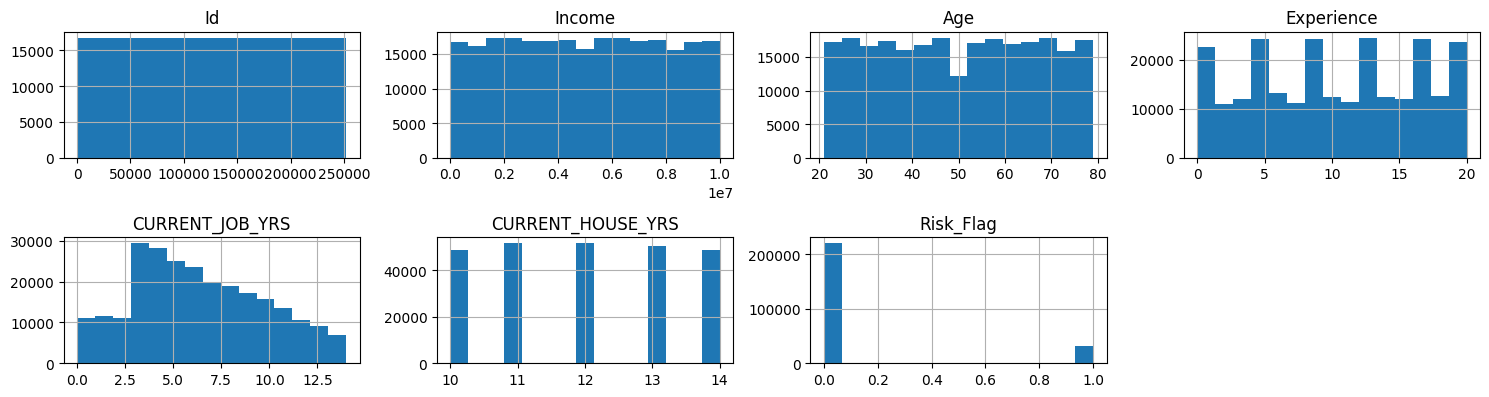

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns

df[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

**Check skewness**

This analysis will help you decide whether adjustments are needed to improve the performance and accuracy of your models.

In [ ]:
numerical_features = ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
df_numerical = df[numerical_features]

print("Skewness of numerical features using Pandas:")
print(df_numerical.skew())

Skewness of numerical features using Pandas:
Id                   0.000000
Income               0.005958
Age                 -0.005316
Experience          -0.012779
CURRENT_JOB_YRS      0.273146
CURRENT_HOUSE_YRS    0.006786
dtype: float64


# **DATA VISUALISATION**

**Plotting a pie chart**

Here, This chart shows Percentage ofDefaulter and Non-Defaulter. Non-Defaulter is 87.7% and Defaulter is 12.3%

Percentage of Defaulter and Non-Defaulter

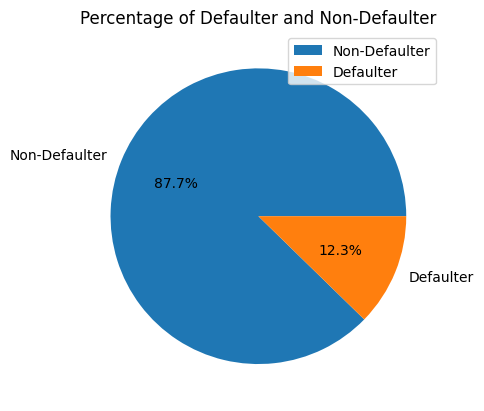

In [ ]:
fig, ax = plt.subplots()
plt.title('Percentage of Defaulter and Non-Defaulter')
df.groupby('Risk_Flag').count()['Id'].plot(
    kind='pie',
    labels=['Non-Defaulter', 'Defaulter'],
    autopct='%1.1f%%',
    ax=ax
)

plt.ylabel('')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()

**Plotting the pie chart**

Here, This chart shows Total % of Customers who are married/single. single is 89.8% and Married is 10.2%

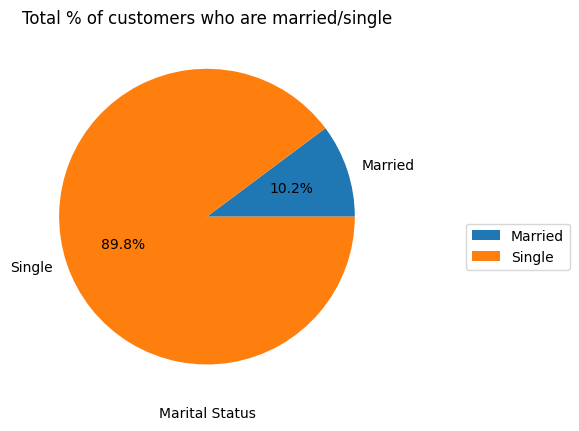

In [ ]:
df.groupby('Married/Single').count()['Id'].plot(
    kind='pie',
    startangle=0,
    labels=['Married', 'Single'],
    autopct='%1.1f%%'
)
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title('Total % of customers who are married/single')
plt.legend(loc='best', bbox_to_anchor=(1, 0, 0.5, 0.5))
plt.show()

**Plotting the pie chart**

Here, This chart shows Percentage ofMarital Status forNon-Defaulter People. single Non-Defaulter People is 89.6% and Married Non-Defaulter People is 10.4%

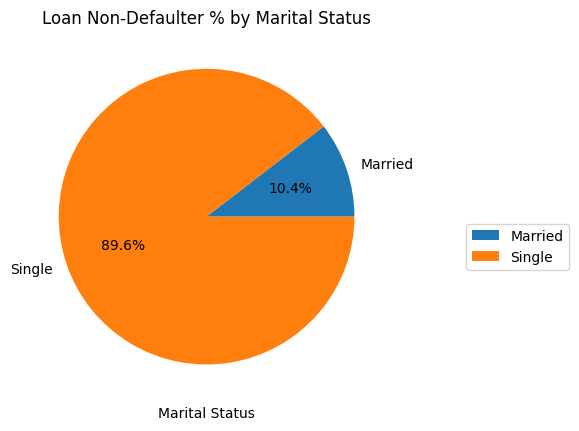

In [ ]:
marital_status = df.loc[df['Risk_Flag'] == 0].groupby('Married/Single').count()['Id']
marital_status.plot(
    kind='pie',
    startangle=0,
    labels=['Married', 'Single'],
    autopct='%1.1f%%'
)
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title('Loan Non-Defaulter % by Marital Status')
plt.legend(loc='best', bbox_to_anchor=(1, 0, 0.5, 0.5))
plt.show()

**Plotting the pie chart**

Here, This chart shows Percentage ofMarital Status forLoan Defaulter.

single loan Defaulter is 91.5% and Married loan Defaulter is 8.5%

Filter the dataframe for rows where 'Risk_Flag' is 1 and group by 'Married/Single'

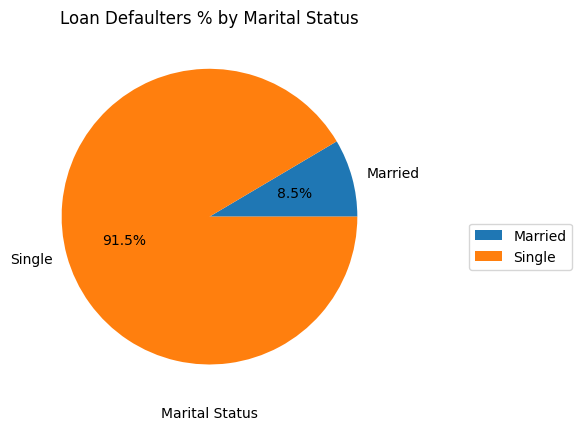

In [ ]:
marital_status = df.loc[df['Risk_Flag'] == 1].groupby('Married/Single').count()['Id']


marital_status.plot(kind='pie', startangle=0, labels=['Married', 'Single'], autopct='%1.1f%%')
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title('Loan Defaulters % by Marital Status')
plt.legend(loc='best', bbox_to_anchor=(1, 0, 0.5, 0.5))
plt.show()

**Plot the main pie chart**

Risk_Flag Distribution related to Mrital status = Married/single Define labels, values, and settings

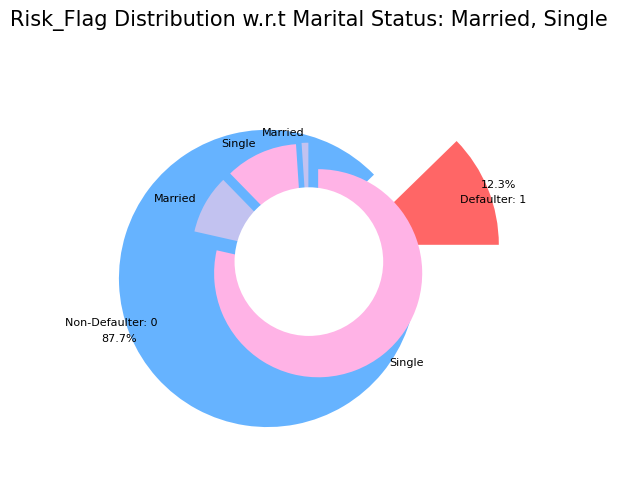

In [ ]:
plt.figure(figsize=(5, 5))


labels = ["Defaulter: 1", "Non-Defaulter: 0"]
values = [30996, 221004]
marital_status = ["Married", "Single", "Married", "Single"]
sizes_marital_status = [2636, 28360, 23092, 197912]
colors = ['#ff6666', '#66b3ff']
colors_marital_status = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode = (0.3, 0.3)
explode_marital_status = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 8}


plt.pie(
    values, labels=labels, autopct='%1.1f%%',
    pctdistance=1.08, labeldistance=0.8, colors=colors,
    explode=explode, textprops=textprops
)


plt.pie(
    sizes_marital_status, labels=marital_status, colors=colors_marital_status,
    startangle=90, radius=0.7, explode=explode_marital_status, textprops=textprops
)


centre_circle = plt.Circle((0, 0), 0.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Risk_Flag Distribution w.r.t Marital Status: Married, Single', fontsize=15, y=1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Creating a count plot for house ownership**

This graph shows the distribution of house ownership types among all customers in the dataset.

The x-axis represents the different types of house ownership, such as "Owned," "Rented," or other categories.

The y-axis represents the number of customers in each house ownership category.

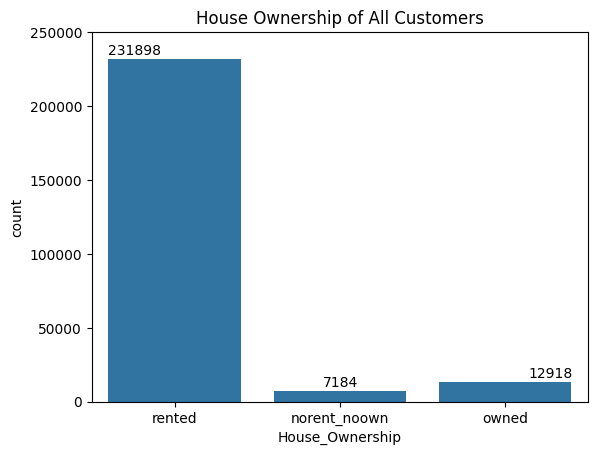

In [ ]:
sns.countplot(data=df, x='House_Ownership')

plt.text(-0.4, 235000, str(231898), fontsize=10, color='black')
plt.text(0.9, 10000, str(7184), fontsize=10, color='black')
plt.text(2.14, 16000, str(12918), fontsize=10, color='black')


plt.title('House Ownership of All Customers')
plt.ylim(0, 250000)


plt.show()

**Plotting the bar chart**

This bar chart displays the top 10 states with the highest number of loans, giving a clear picture of where most loans were taken from in the dataset.

Adding text annotations on top of each bar to show the number of loans Adding a legend and displaying the plot

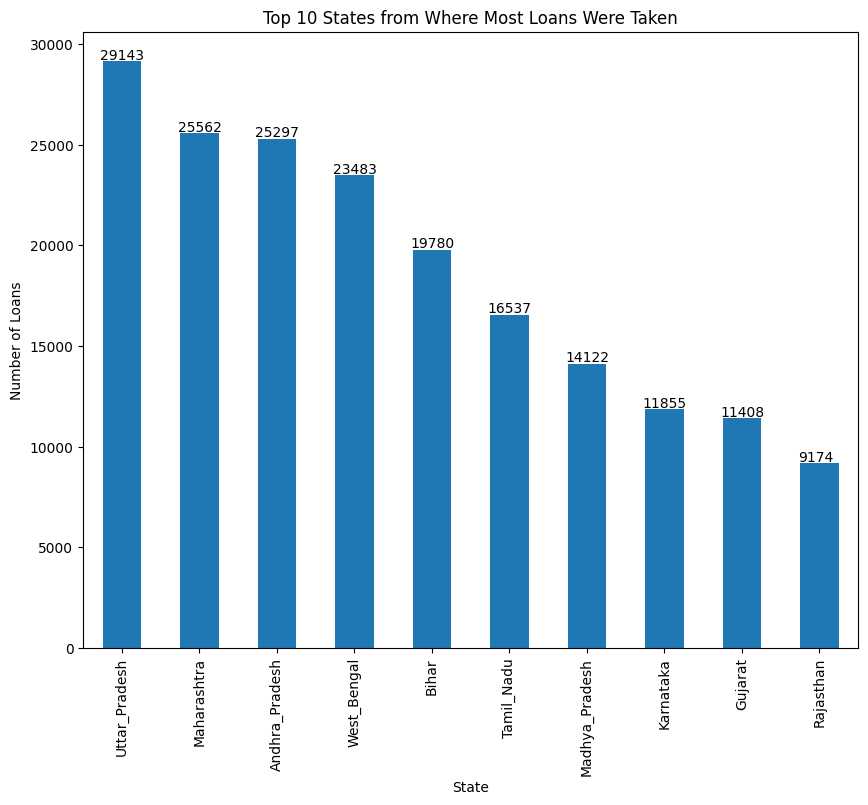

In [ ]:
df2 = df.groupby('STATE').count()
df2.rename(columns={'Id': 'Total_Loans'}, inplace=True)
df2.reset_index(inplace=True)


df_total_loans = df2[['STATE', 'Total_Loans']].sort_values(by='Total_Loans', ascending=False).head(10)


df_total_loans.plot(kind='bar', x='STATE', figsize=(10, 8), legend=False)
plt.title('Top 10 States from Where Most Loans Were Taken')
plt.xlabel('State')
plt.ylabel('Number of Loans')


for index, value in enumerate(df_total_loans['Total_Loans']):
    plt.text(index - 0.28, value + 100, str(value), fontsize=10, color='black')


plt.show()

**Plotting the bar chart**

This bar chart displays the top 10 cities with the highest number of loans, giving a clear picture of where most loans were taken from in the dataset.

Adding text annotations on top of each bar to show the number of loans Adding a legend and displaying the plot

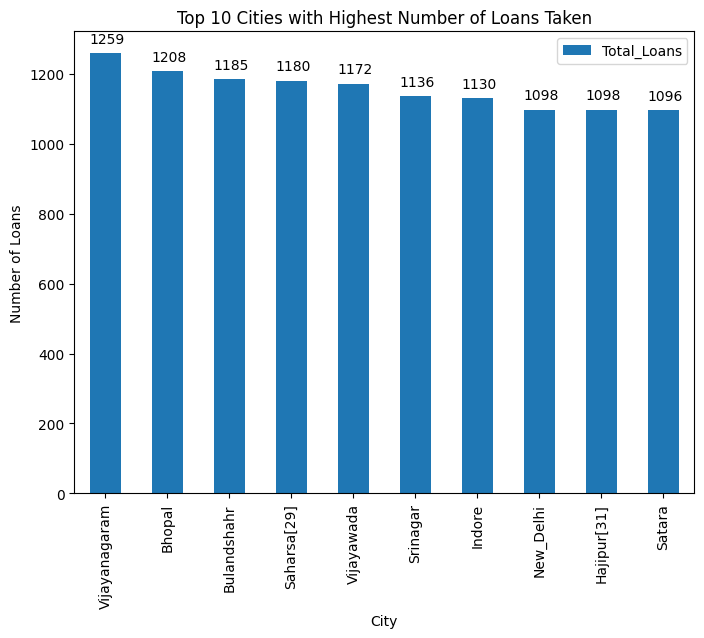

In [ ]:
df3 = df.groupby('CITY').count().reset_index()
df3.rename(columns={'Id': 'Total_Loans'}, inplace=True)


df3_ = df3[['CITY', 'Total_Loans']].sort_values(by='Total_Loans', ascending=False).head(10)


df3_.plot(kind='bar', x='CITY', figsize=(8, 6), legend=False)
plt.title('Top 10 Cities with Highest Number of Loans Taken')
plt.xlabel('City')
plt.ylabel('Number of Loans')


for index, value in enumerate(df3_['Total_Loans']):
    plt.text(index - 0.25, value + 30, str(int(value)), fontsize=10, color='black')


plt.legend(loc='best')
plt.show()

**Plotting the horizontal bar chart**

The analysis involves sorting the professions by their income and visualizing the top 15 highest-paying professions. This can help in understanding:

How income varies across different professions. Observing trends in which professions are seeing increased earnings or interest over time.

Highlighting income disparities between sectors (e.g., tech vs. education) and providing data for policymakers or educational institutions.

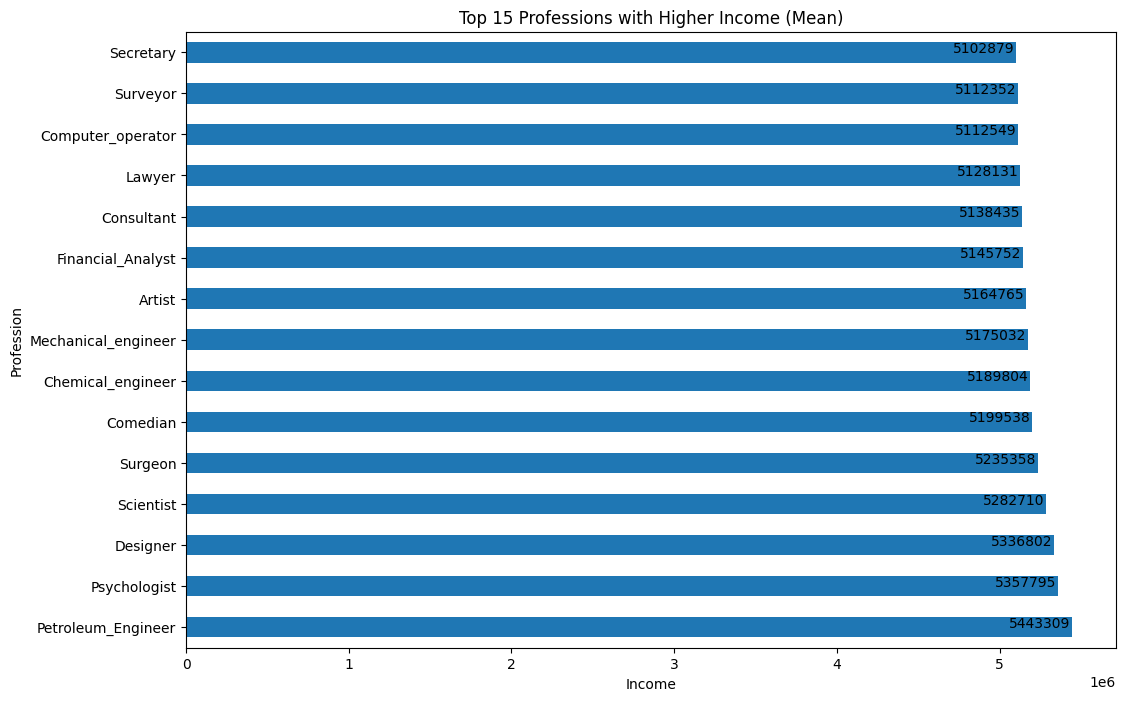

In [ ]:
profession_top10_income = df.groupby('Profession')['Income'].mean().sort_values(ascending=False).head(15)


profession_top10_income.plot(kind='barh', figsize=(12, 8), legend=False)
plt.title('Top 15 Professions with Higher Income (Mean)')
plt.xlabel('Income')
plt.ylabel('Profession')


for index, value in enumerate(profession_top10_income):
    plt.text(value - 10000, index, str(int(value)), fontsize=10, color='black', ha='right')


plt.yticks(ticks=range(len(profession_top10_income)), labels=profession_top10_income.index)


plt.show()

**Plotting the horizontal bar chart**

This analysis provides insights into the professions with the highest mean income among individuals who have defaulted on loans. It can help identify potential financial risks associated with certain professions and inform decisions by lenders or policymakers. The bar chart visually represents the data, making it easier to compare the mean incomes of the top 15 defaulting professions.

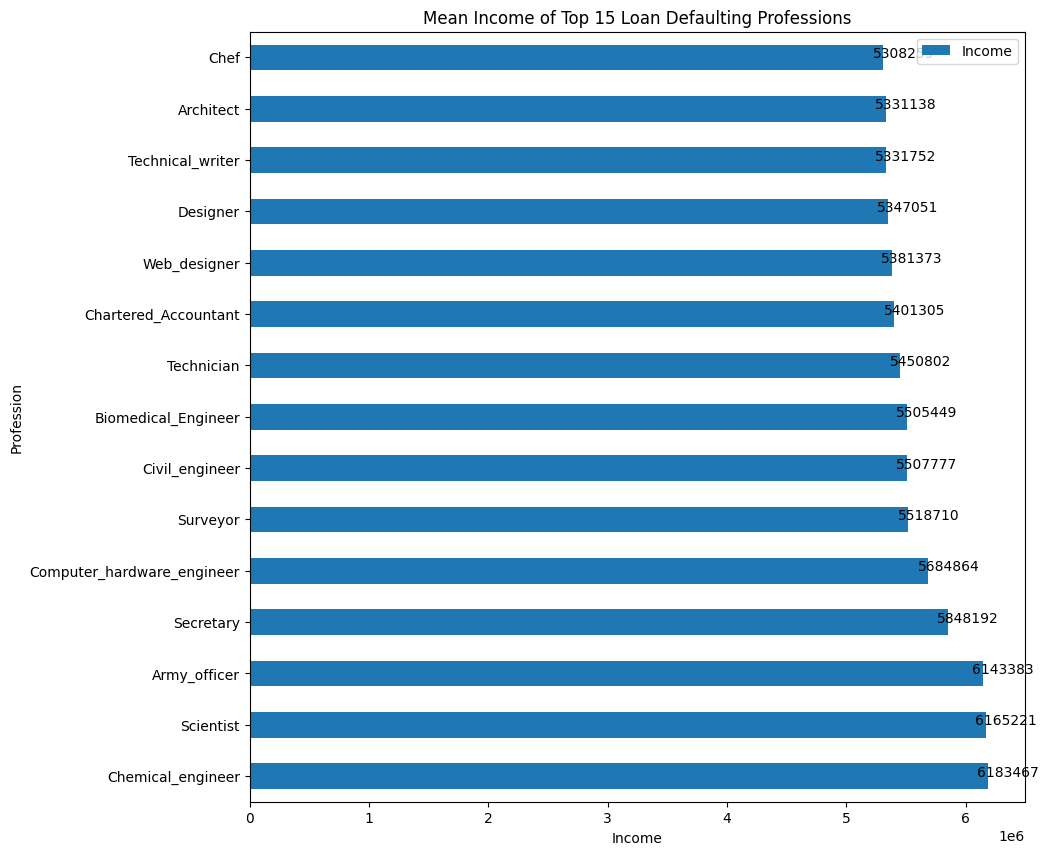

In [ ]:
df_ = df.loc[df['Risk_Flag'] == 1].groupby('Profession')['Income'].mean().sort_values(ascending=False)


top_15_income = df_.head(15)


top_15_income.plot(kind='barh', figsize=(10, 10))
plt.title('Mean Income of Top 15 Loan Defaulting Professions')
plt.xlabel('Income')
plt.ylabel('Profession')


for index, value in enumerate(top_15_income):
    plt.text(value - 90000, index, str(int(value)), fontsize=10, color='black')  # Adjust positioning as needed

plt.legend(loc='best')
plt.show()

**Pair plot**

To visualize relationships between multiple pairs of variables.

creates a grid of scatter plots for each pair of numerical features in a DataFrame. It also displays histograms (or density plots) along the diagonal for each feature, allowing you to visualize distributions.

By examining scatter plots, you can identify trends, correlations, or clusters among pairs of numerical variables.

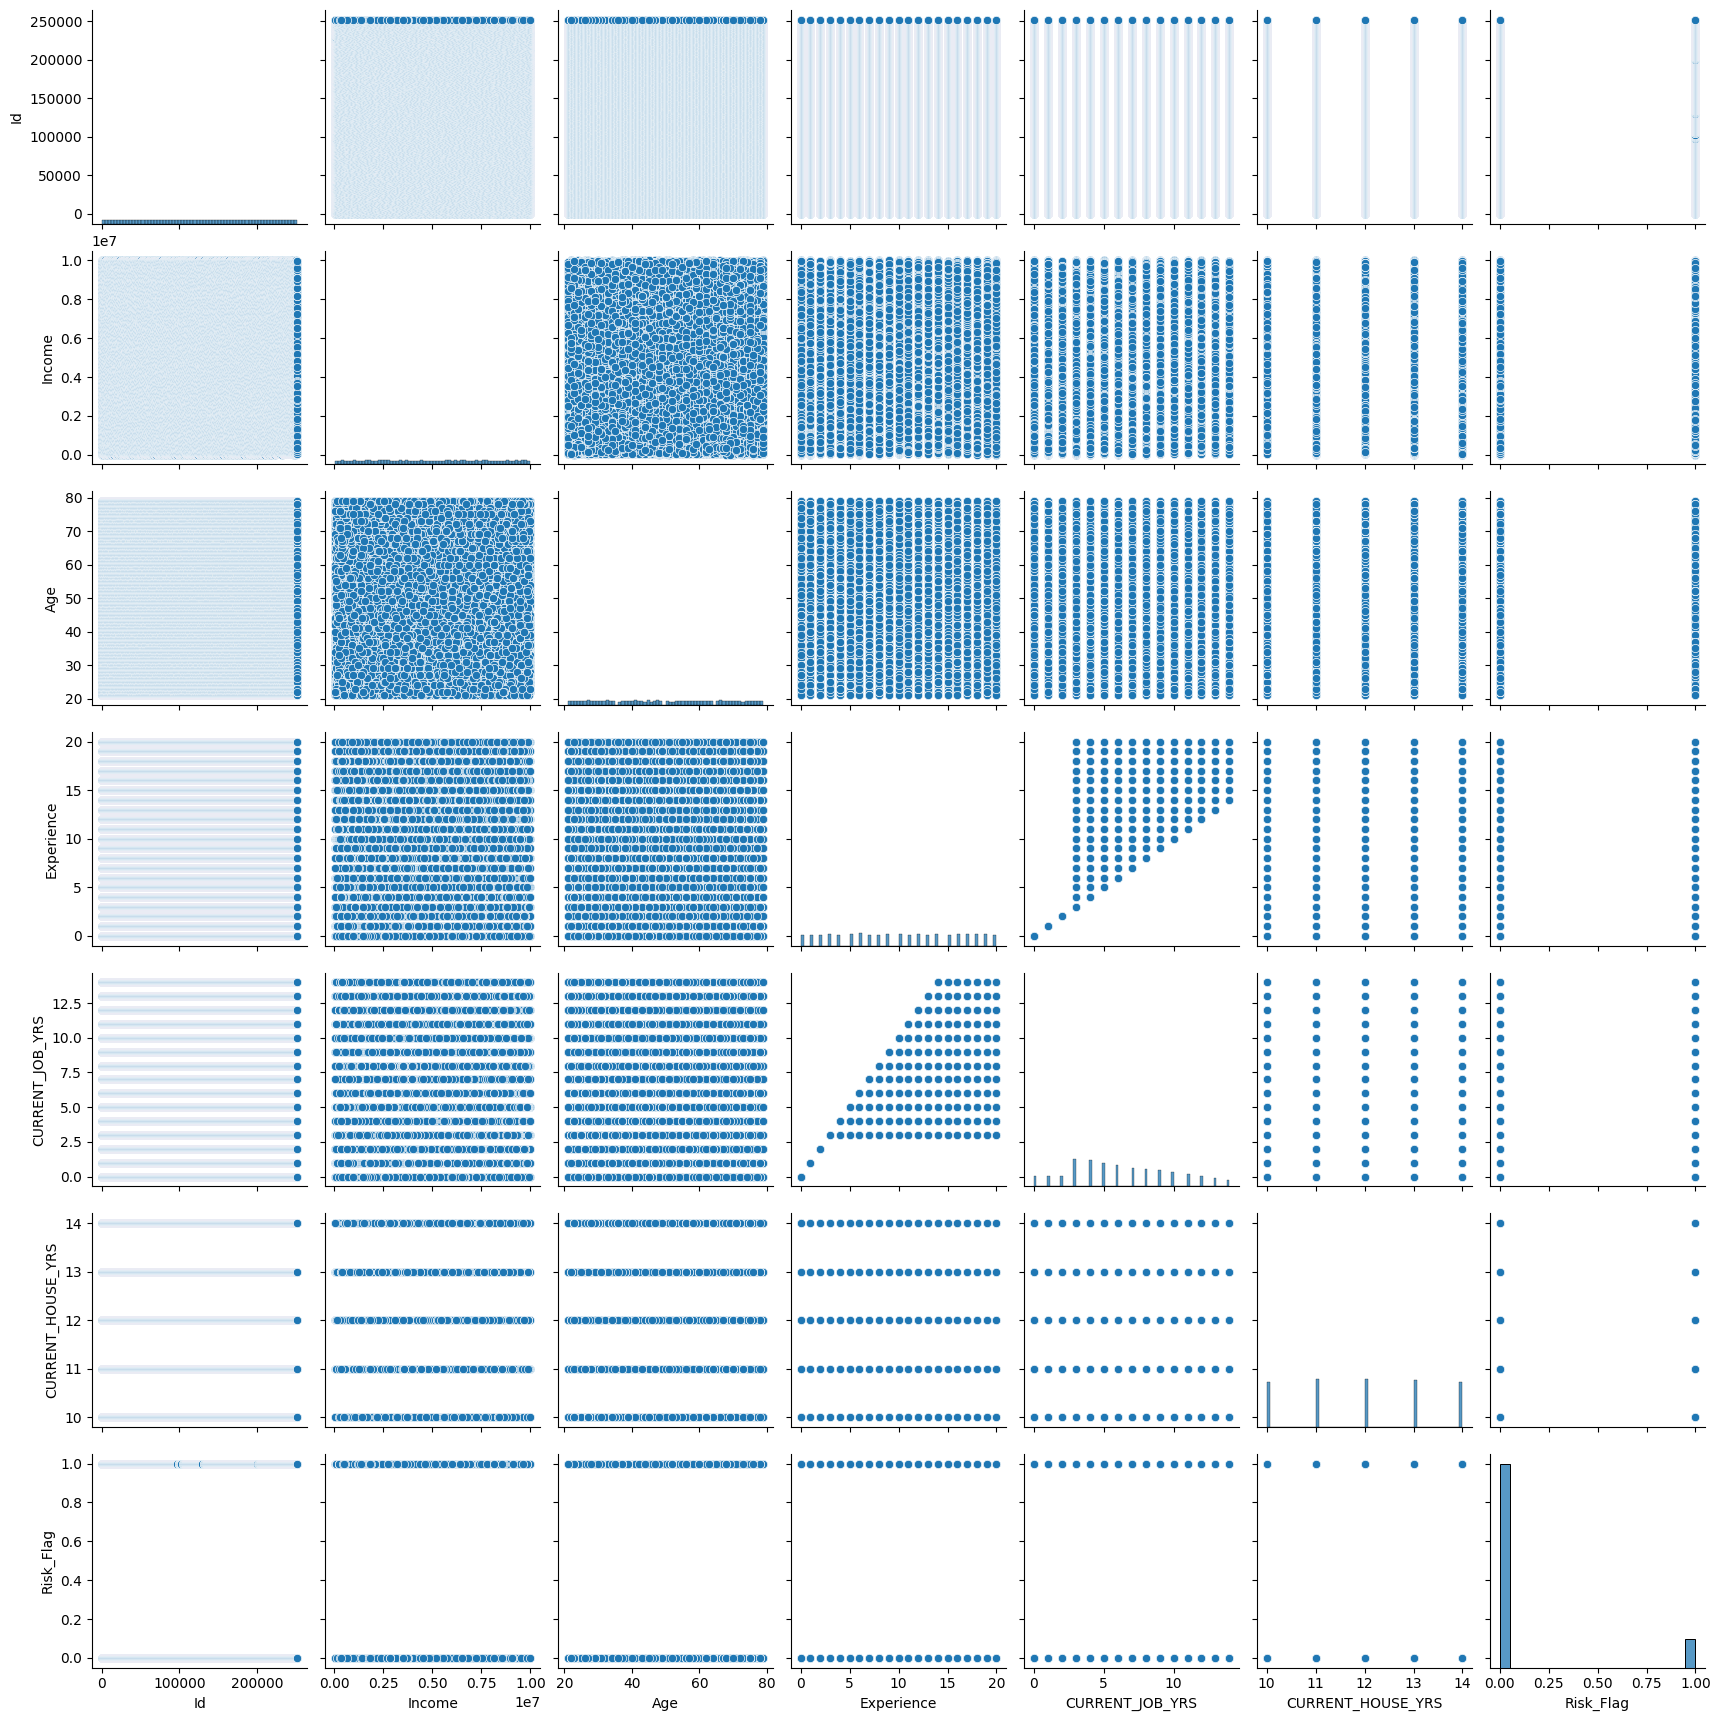

In [ ]:
sns.pairplot(df)

**Seperatig nuemerical columns and categorical columns**

In [ ]:
numericalFeatures = df.select_dtypes(include=['number']).columns.tolist()
categoricalFeatures = df.select_dtypes(include=['object']).columns.tolist()

print(f"The Numerical Features are: \n {numericalFeatures}")

print(f"The Categorical Features are: \n {categoricalFeatures}")

The Numerical Features are: 
 ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
The Categorical Features are: 
 ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


# **FEATURE ENGINEERING**

**Compute the correlation matrix**

**List of numerical features excluding the target variable**

**Plot a heatmap**

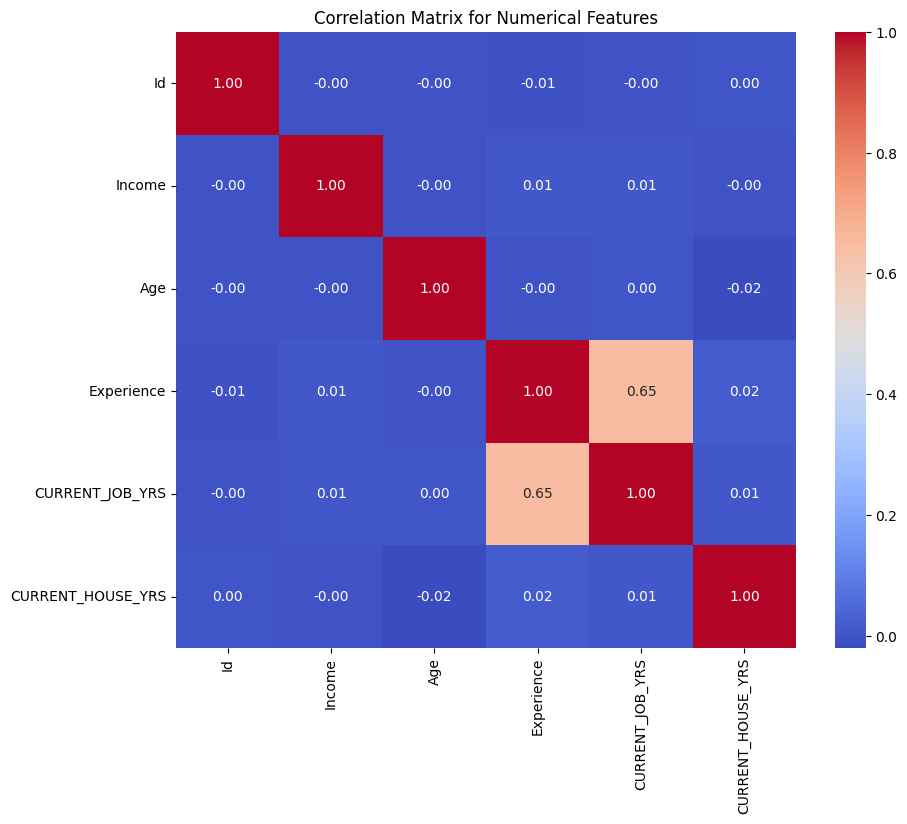

In [ ]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

**As visible above, the variables Experience and CURRENT_JOB_YRS are highly correlated independant variables. This can hamper the accuracy and overall health of our machine learning models. We therefore remove the non-important variables from our dataset. Since our model is more classification in nature, we do not necessarily need to remove all multicollinear variables.**

**Dropping Unwanted columns**

Drop the Id and 'CURRENT_JOB_YRS' column Both are un wanted columns

In [ ]:
df = df.drop(columns=['Id', 'CURRENT_JOB_YRS'])

In [ ]:
print(df)

         Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0       1303834   23           3         single          rented            no   
1       7574516   40          10         single          rented            no   
2       3991815   66           4        married          rented            no   
3       6256451   41           2         single          rented           yes   
4       5768871   47          11         single          rented            no   
...         ...  ...         ...            ...             ...           ...   
251995  8154883   43          13         single          rented            no   
251996  2843572   26          10         single          rented            no   
251997  4522448   46           7         single          rented            no   
251998  6507128   45           0         single          rented            no   
251999  9070230   70          17         single          rented            no   

                 Profession

# **One hot encoding**

One-Hot Encoding is a method used to convert categorical variables into a form that can be provided to machine learning algorithms to improve performance. It transforms each category into a new binary column (0 or 1).

In [ ]:
df1oh = pd.get_dummies(df[['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']])
df1oh = df1oh.applymap(int)
df1 = pd.concat([df, df1oh], axis=1)
df1=df1.drop(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'],axis=1)
df1

,Income,Age,Experience,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,...,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,13,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,13,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,10,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,12,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,14,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,11,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
251996,2843572,26,10,11,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,7,12,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,0,10,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


# **STANDARIZATION**

**Scaling using StandardScaler**

StandardScaler is a feature scaling technique used to standardize the features of your dataset. It transforms the data such that the mean of each feature becomes 0 and the standard deviation becomes 1. This is important when your data has features with different units or scales, as it ensures that each feature contributes equally to the model's performance.

In [ ]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)
df1_scaled

,Income,Age,Experience,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,...,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,-1.283145,-1.579604,-1.180232,0.716356,-0.374501,-0.337200,0.337200,-0.171302,-0.232447,0.294423,...,-0.075624,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.361621,-0.086558,-0.320566
1,0.895457,-0.583344,-0.014067,0.716356,-0.374501,-0.337200,0.337200,-0.171302,-0.232447,0.294423,...,-0.075624,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.361621,-0.086558,-0.320566
2,-0.349269,0.940348,-1.013637,-1.427981,-0.374501,2.965599,-2.965599,-0.171302,-0.232447,0.294423,...,-0.075624,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.361621,-0.086558,-0.320566
3,0.437526,-0.524740,-1.346827,0.001577,2.670221,-0.337200,0.337200,-0.171302,-0.232447,0.294423,...,-0.075624,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.361621,-0.086558,-0.320566
4,0.268128,-0.173119,0.152528,1.431135,2.670221,-0.337200,0.337200,-0.171302,-0.232447,0.294423,...,-0.075624,-0.138158,-0.194371,-0.049179,3.773401,-0.175431,-0.056751,-0.361621,-0.086558,-0.320566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,1.097092,-0.407533,0.485719,-0.713202,-0.374501,-0.337200,0.337200,-0.171302,-0.232447,0.294423,...,-0.075624,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.361621,-0.086558,3.119482
251996,-0.748199,-1.403793,-0.014067,-0.713202,-0.374501,-0.337200,0.337200,-0.171302,-0.232447,0.294423,...,-0.075624,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.361621,-0.086558,-0.320566
251997,-0.164913,-0.231723,-0.513852,0.001577,-0.374501,-0.337200,0.337200,-0.171302,-0.232447,0.294423,...,-0.075624,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.361621,-0.086558,-0.320566
251998,0.524618,-0.290326,-1.680018,-1.427981,-0.374501,-0.337200,0.337200,-0.171302,-0.232447,0.294423,...,13.223269,-0.138158,-0.194371,-0.049179,-0.265013,-0.175431,-0.056751,-0.361621,-0.086558,-0.320566


**Resampling the Data**

Our Dataset is a imbalanced dataset.Beacause Risk_FIag is a target variable and it contains 0 is 221004 times and 1 is 30996 times, which is not balanced.

In [ ]:
sampler = RandomOverSampler(random_state=42,sampling_strategy=0.45)
X= df1_scaled.drop(["Risk_Flag"],axis =1)
y= df1_scaled["Risk_Flag"]
y = df1_scaled["Risk_Flag"].astype(int)
X_sampled,y_sampled = sampler.fit_resample(X,y)

sampler = RandomOverSampler(random_state=42, sampling_strategy=0.45)
X_sampled, y_sampled = sampler.fit_resample(X, y)

In [ ]:
y = np.where(y == 2, 1, y)  # Change 2 to 1
y = y.astype(int)

**Split the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# **Model selection training and evaluation**

**Selected Models are**

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

Gradient Boosting Classifier

K-Neighbors Classifier

**Initialize the models**

Logistic Regression (Elapsed Time: 2.40 seconds)
Saved Logistic Regression as Logistic Regression.pkl

--------------------------------------
Train Accuracy: 0.8773922902494331
Test Accuracy: 0.8760846560846561
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.00      0.00      0.00      9368

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

Confusion Matrix:
[[66232     0]
 [ 9368     0]]



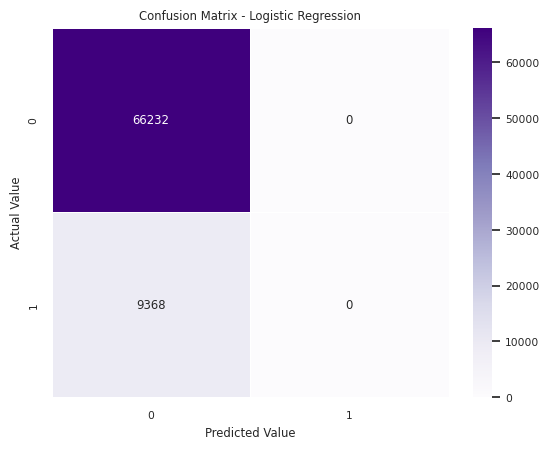

Decision Tree Classifier (Elapsed Time: 74.34 seconds)
Saved Decision Tree Classifier as Decision Tree Classifier.pkl

--------------------------------------
Train Accuracy: 0.9370124716553287
Test Accuracy: 0.884100529100529
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     66232
           1       0.53      0.55      0.54      9368

    accuracy                           0.88     75600
   macro avg       0.73      0.74      0.74     75600
weighted avg       0.89      0.88      0.88     75600

Confusion Matrix:
[[61711  4521]
 [ 4241  5127]]



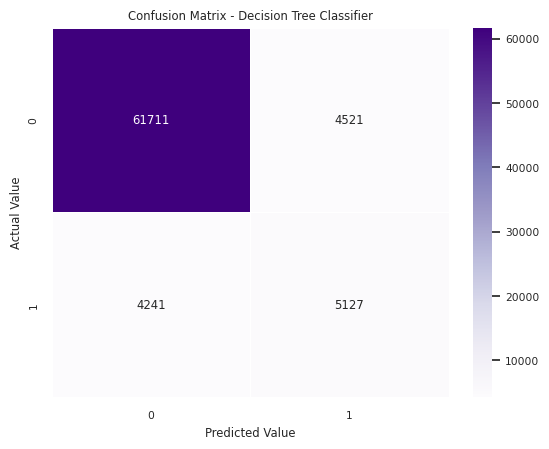

Random Forest Classifier (Elapsed Time: 223.35 seconds)
Saved Random Forest Classifier as Random Forest Classifier.pkl

--------------------------------------
Train Accuracy: 0.9369954648526078
Test Accuracy: 0.8982407407407408
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66232
           1       0.60      0.53      0.56      9368

    accuracy                           0.90     75600
   macro avg       0.77      0.74      0.75     75600
weighted avg       0.89      0.90      0.90     75600

Confusion Matrix:
[[62967  3265]
 [ 4428  4940]]



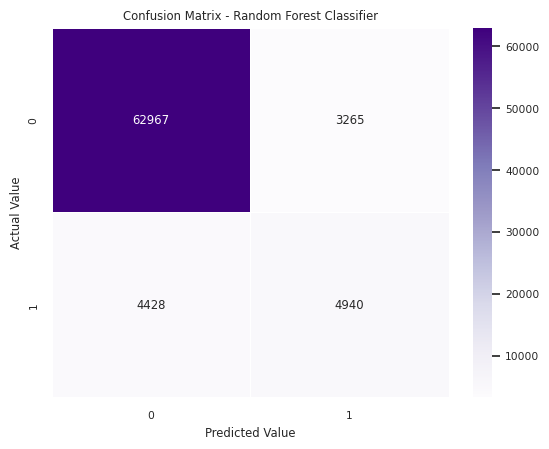

Gradient Boosting (Elapsed Time: 144.76 seconds)
Saved Gradient Boosting as Gradient Boosting.pkl

--------------------------------------
Train Accuracy: 0.8776473922902495
Test Accuracy: 0.8762433862433863
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66232
           1       0.80      0.00      0.00      9368

    accuracy                           0.88     75600
   macro avg       0.84      0.50      0.47     75600
weighted avg       0.87      0.88      0.82     75600

Confusion Matrix:
[[66228     4]
 [ 9352    16]]



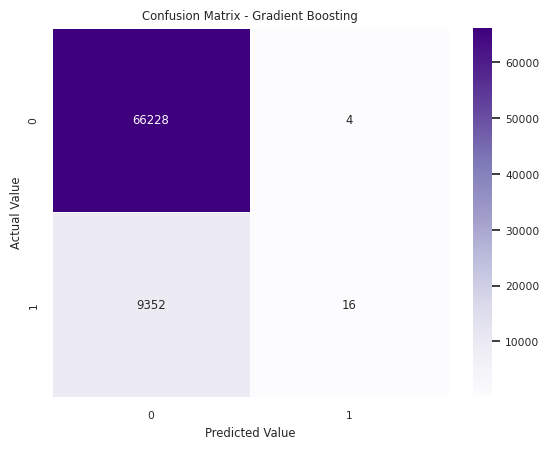

K-Neighbors Classifier (Elapsed Time: 0.54 seconds)
Saved K-Neighbors Classifier as K-Neighbors Classifier.pkl

--------------------------------------
Train Accuracy: 0.9002324263038549
Test Accuracy: 0.8891798941798942
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     66232
           1       0.56      0.49      0.52      9368

    accuracy                           0.89     75600
   macro avg       0.74      0.72      0.73     75600
weighted avg       0.88      0.89      0.89     75600

Confusion Matrix:
[[62635  3597]
 [ 4781  4587]]



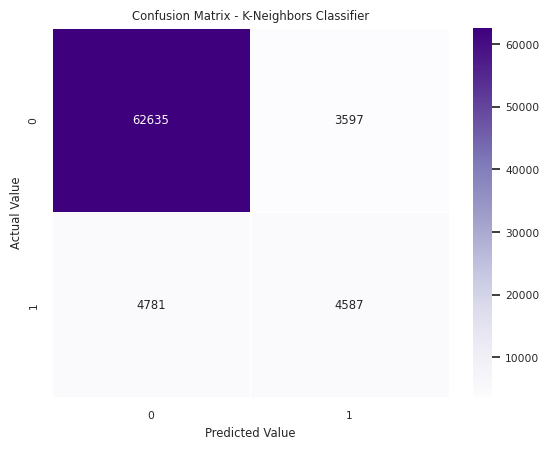

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier()

}

# Training the models, fitting X_train and y_train to each model
for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]

    # Measure the start time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Measure the end time
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Evaluate the model's performance
    print(f"{model_name} (Elapsed Time: {elapsed_time:.2f} seconds)")
    model_list = [model_name]

    # Save the model
    with open(f'{model_name}.pkl', 'wb') as file:
        pickle.dump(model, file)
        print(f"Saved {model_name} as {model_name}.pkl")

    print("\n--------------------------------------")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("\n==========================================")

    # Plot the confusion matrix
    con_matrix = confusion_matrix(y_test, y_test_pred)
    sns.set(font_scale=0.7)
    sns.heatmap(con_matrix, annot=True, cmap="Purples", fmt='g', linewidths=0.6)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# **Hyper parameter tuning**

In [ ]:
def hyperparameter_tuning():
    param_grid = {
        'Decision Tree Classifier': {
            "model": DecisionTreeClassifier(),
            "params": {
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'criterion': ['gini', 'entropy']
            }
        },
        'Random Forest Classifier': {
            "model": RandomForestClassifier(random_state=42),
            "params": {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]
            }
        }

    }

    best_models = {}

    for model_name, model_details in param_grid.items():
        model = model_details['model']
        param_dist = model_details['params']
        print(f"Tuning {model_name}")

        try:
            # Using RandomizedSearchCV for faster tuning
            random_search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_dist,
                cv=3,
                scoring='accuracy',
                n_iter=10,
                n_jobs=-1,
                random_state=42
            )

            random_search.fit(X_train, y_train)

            best_models[model_name] = random_search.best_estimator_
            best_params = random_search.best_params_
            best_score = random_search.best_score_

            # Predictions and evaluation
            y_train_pred = random_search.best_estimator_.predict(X_train)
            y_test_pred = random_search.best_estimator_.predict(X_test)

            print(f"Best parameters: {best_params}")
            print(f"Best cross-validation score: {best_score}")
            print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
            print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
            print("Classification Report:")
            print(classification_report(y_test, y_test_pred))
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_test_pred))
            print("="*50)

        except Exception as e:
            print(f"Error occurred while tuning {model_name}: {e}")

    return best_models

best_models = hyperparameter_tuning()

Tuning Decision Tree Classifier
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini'}
Best cross-validation score: 0.8897675736961451
Train Accuracy: 0.912641723356009
Test Accuracy: 0.8902116402116402
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     66232
           1       0.56      0.53      0.54      9368

    accuracy                           0.89     75600
   macro avg       0.75      0.73      0.74     75600
weighted avg       0.89      0.89      0.89     75600

Confusion Matrix:
[[62375  3857]
 [ 4443  4925]]
Tuning Random Forest Classifier
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Best cross-validation score: 0.8899659863945578
Train Accuracy: 0.8961054421768707
Test Accuracy: 0.8883201058201058
Classification Report:
              precision    recall  f1-score   supp

# **CONCLUSION**

The objective of this project was to create a model that accurately and reliably assesses the risk of lending to potential borrowers, predicting the likelihood of loan default or repayment based on various customer factors and their historical behaviors.Based on our analysis, the Decision Tree Classifier is the more suitable model for this project. Its combination of accuracy and balanced performance between precision and recall for the high-risk class makes it effective at identifying loan applicants likely to default. This performance aligns well with our objective to reliably assess lending risk, as it provides a more consistent prediction of high-risk cases.